In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm, lognorm

data = pd.read_csv('/content/drive/My Drive/DataDownloded/Sales/sales.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [ ]:
data.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [ ]:
data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [ ]:
data2 = data.loc[(data.Open == 1),['Store','DayOfWeek','Sales','Customers']]

In [ ]:
data2

,Store,DayOfWeek,Sales,Customers
0,1,5,5263,555
1,2,5,6064,625
2,3,5,8314,821
3,4,5,13995,1498
4,5,5,4822,559
...,...,...,...,...
1016776,682,2,3375,566
1016827,733,2,10765,2377
1016863,769,2,5035,1248
1017042,948,2,4491,1039


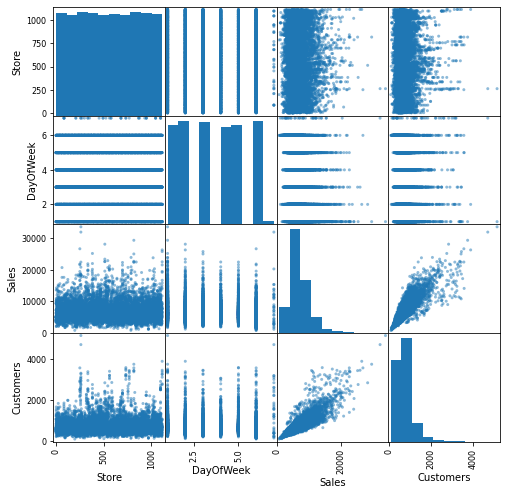

In [ ]:
pd.plotting.scatter_matrix(data2.iloc[::100,:], figsize=(8,8));

It gets the plot for every 100th row using this      [::100]

In [ ]:
data3 = data2.groupby('DayOfWeek').agg({'Sales':["mean",'std']})
data3

Sales             
                  mean          std
DayOfWeek                          
1          8216.073074  3691.768876
2          7088.113656  3066.237110
3          6728.122978  2781.775174
4          6767.310159  2764.548119
5          7072.677012  2764.915744
6          5874.840238  2852.730426
7          8224.723908  6235.152960

Text(0, 0.5, 'p($)')

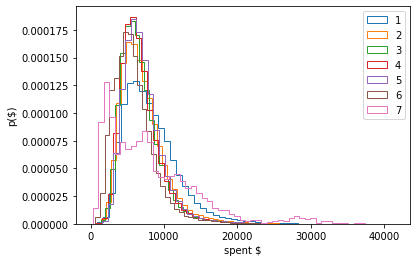

In [ ]:
for day,frame in data2.groupby('DayOfWeek'):
  plt.hist(frame.Sales, label =day, bins =50, histtype ='step',density=True)
plt.legend()
plt.xlabel('spent $')
plt.ylabel('p($)')

It is not well distributed, it has a very large tail.

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.p

Text(0, 0.5, 'p($)')

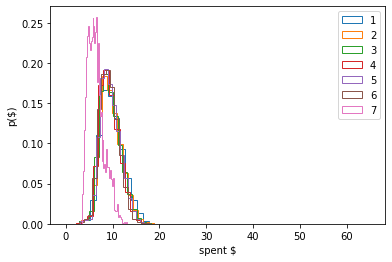

In [ ]:
for day,frame in data2.groupby('DayOfWeek'):
  plt.hist(frame.Sales/ frame.Customers, label =day, bins =50, histtype ='step',density=True)
plt.legend()
plt.xlabel('spent $')
plt.ylabel('p($)')

Sunday is a bit out of line 
because we have very less data for sundaty as we have given density = true it is scaling the value up.Sunday might not give good result it is fairly gaussian. 


**Relation between mean and std deviation**

{1: {'spend': (9.896977492736045, 2.3848164305358375)}, 2: {'spend': (9.594422073159746, 2.26360354244727)}, 3: {'spend': (9.496812149001727, 2.199600748654478)}, 4: {'spend': (9.35815236694504, 2.120318915968076)}, 5: {'spend': (9.438294893592795, 2.1183778390610444)}, 6: {'spend': (9.260104343618268, 1.9802523286171916)}, 7: {'spend': (6.458912595386232, 1.7326550392889761)}}


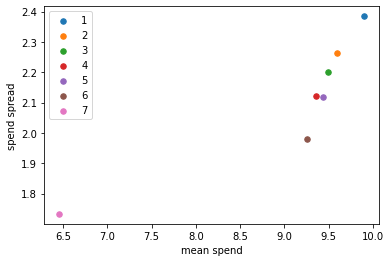

In [ ]:
res = {}

for day,frame in data2.groupby('DayOfWeek'):
  data = frame.Sales/frame.Customers
  mean , std = data.mean(),data.std()
  res[day] = {"spend":(mean,std)}
  plt.scatter([mean],[std],label =day ,s =30)
plt.legend()
plt.xlabel('mean spend')
plt.ylabel('spend spread')
print(res)

We can see that it has a fairly **linear relationship** between the data .
For example, if we were to use this data insight, we would only need the number of customers and mean spend (two data vectors) instead of number of customers, mean spend and spend spread. Because we can utilise the existing relationships to predict tha



Text(0, 0.5, 'p(#)')

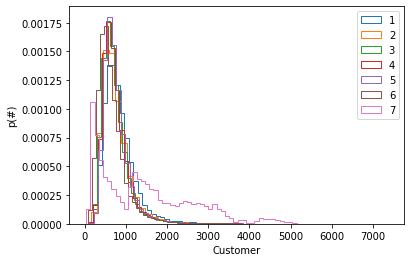

In [ ]:
for day,frame in data2.groupby('DayOfWeek'):
  plt.hist(frame.Customers, label =day, bins =50, histtype ='step',density=True)
plt.legend()
plt.xlabel('Customer')
plt.ylabel('p(#)')

1 (0.42038878818699443, -10.032692993969142, 788.8147308767948)
2 (0.42200435444496087, -8.635117127779155, 708.0591923600157)
3 (0.4058240663771445, -14.951182400678398, 691.153794854348)
4 (0.3996014591216416, -18.88871077202447, 710.0978077100474)
5 (0.3856014095983238, -9.0011023377721, 728.4210866652444)
6 (0.48161329385838514, -10.237149440491677, 593.1012008082414)
7 (0.8966735024097416, -47.63982355166327, 1057.8329147904133)


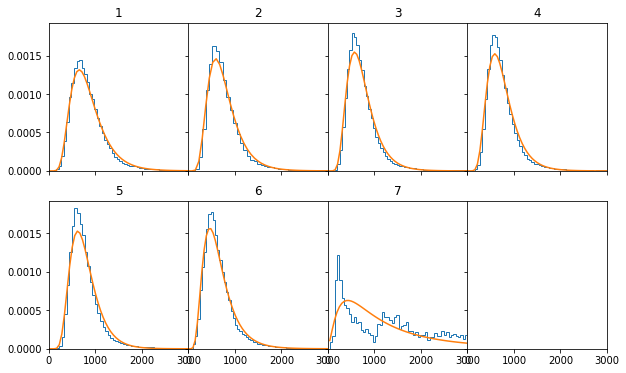

In [ ]:
fig ,axes = plt.subplots(figsize=(10,6), nrows = 2, ncols = 4, sharey = True, sharex= True)
fig.subplots_adjust(wspace=0)

for ax, (day, frame) in zip(axes.flatten(), data2.groupby('DayOfWeek')):
  params = lognorm .fit(frame.Customers, scale =1000)
  ax.hist(frame.Customers, bins =100, density = True,histtype ='step')
  xs= np.linspace(frame.Customers.min(), frame.Customers.max(), 100)
  ax.plot(xs, lognorm.pdf(xs, *params))
  ax.set_title(day)
  ax.set_xlim(0,3000)
  res[day]['cust']= list(params)
  print(day, params)

So with the exception of Sunday, we could really model *all* of these dists as having 0 mean, shape parameter of around 0.4, and a scale that varies slightly with each day, generally around 700.


In [ ]:
data2.groupby('DayOfWeek').agg({'Sales':["mean",'std'],'Customers':["mean",'std']}).head()

Sales                Customers            
                  mean          std        mean         std
DayOfWeek                                                  
1          8216.073074  3691.768876  855.444984  420.044289
2          7088.113656  3066.237110  769.986753  389.827138
3          6728.122978  2781.775174  740.598876  372.526903
4          6767.310159  2764.548119  755.569784  379.039732
5          7072.677012  2764.915744  781.771639  383.004679

In [47]:
# If we wanted to draw simulated values and run with that (instead of using the actual data)
percentiles = 100 * norm.cdf([-1, 0, 1])
n = 100000
# for each day, sample # customers and sample their spend
for day, dic in res.items():
    spend = norm(*dic["spend"]).rvs(n)
    custs = lognorm(*dic["cust"]).rvs(n)
    profit = custs * spend
    vals = np.percentile(profit, percentiles)
    diff = np.diff(vals)
    print(f"Day {day} has profit {vals[1]:.2f}(+{diff[1]:.2f})(-{diff[0]:.2f})")

Day 1 has profit 7515.94(+4701.08)(-2987.83)
Day 2 has profit 6564.91(+4088.92)(-2591.65)
Day 3 has profit 6278.26(+3821.15)(-2429.14)
Day 4 has profit 6328.90(+3763.83)(-2426.41)
Day 5 has profit 6660.93(+3764.54)(-2478.30)
Day 6 has profit 5300.13(+3749.94)(-2242.03)
Day 7 has profit 6280.48(+10150.15)(-4019.74)


In [49]:
for day, dic in res.items():
    mean_spend = dic["spend"][0]
    num_cust = dic["cust"][2]
    
    spend = norm(mean_spend, mean_spend*0.25).rvs(n)
    custs = lognorm(0.4, 0, num_cust).rvs(n)
    profit = custs * spend
    vals = np.percentile(profit, percentiles)
    diff = np.diff(vals)
    print(f"Day {day} has profit {vals[1]:.2f}(+{diff[1]:.2f})(-{diff[0]:.2f})")

Day 1 has profit 7634.97(+4554.96)(-2945.84)
Day 2 has profit 6634.57(+4016.83)(-2569.58)
Day 3 has profit 6397.61(+3883.08)(-2463.94)
Day 4 has profit 6488.77(+3865.00)(-2511.70)
Day 5 has profit 6724.27(+4005.43)(-2610.85)
Day 6 has profit 5353.76(+3210.68)(-2064.34)
Day 7 has profit 6654.54(+4003.60)(-2552.65)


So you can see, apart from Sunday, this is a pretty good approximation. And if you do something like this you can try and answer further questions easily. 

In [50]:
for day, dic in res.items():
    mean_spend = dic["spend"][0]
    num_cust = dic["cust"][2]
    
    spend = norm(mean_spend+1, mean_spend*0.25*1.5).rvs(n)
    custs = lognorm(0.4, 0, num_cust).rvs(n)
    profit = custs * spend
    vals = np.percentile(profit, percentiles)
    diff = np.diff(vals)
    print(f"Day {day} has profit {vals[1]:.2f}(+{diff[1]:.2f})(-{diff[0]:.2f})")
    

Day 1 has profit 8321.46(+5601.38)(-3630.42)
Day 2 has profit 7242.82(+4888.30)(-3163.68)
Day 3 has profit 7021.80(+4694.06)(-3070.11)
Day 4 has profit 7103.03(+4777.85)(-3080.33)
Day 5 has profit 7347.71(+4971.53)(-3210.60)
Day 6 has profit 5874.36(+3959.08)(-2547.87)
Day 7 has profit 7664.73(+5007.82)(-3298.65)


This is just an example that there is a 50% increase in spend of people